In [1]:
#Some necessary libraries
import librosa
import numpy as np
import matplotlib.pyplot as plt

# ΜΕΡΟΣ 1

In [13]:
def bark(frequencies):
    return 13 * np.arctan(0.00076 * frequencies) + 3.5 * np.arctan((frequencies / 7500) ** 2)

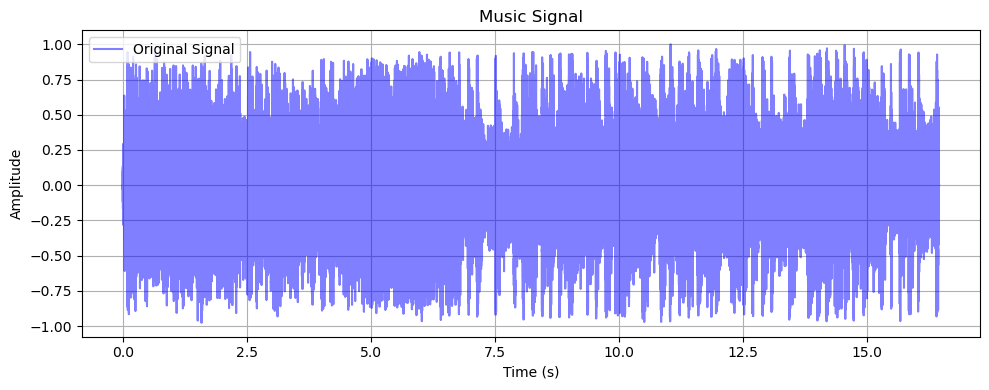

In [2]:
#Loading and plotting the music signal

audio_data, sr = librosa.load('music_dsp2024.wav', sr=44100, mono=True)
audio_data = audio_data / np.max(np.abs(audio_data))
audio_data = np.append(audio_data, np.zeros(294)) #zero-padding

plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_data)) / sr, audio_data, label='Original Signal', color='b', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Music Signal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [176]:
#Framing

N = 512  
hop_length = N 

frames = librosa.util.frame(audio_data, frame_length=N, hop_length=hop_length)
window = np.hanning(N)
windowed_frames = frames * window[:, np.newaxis]

print(windowed_frames.T)
print(len(windowed_frames.T))
print(len(windowed_frames))


[[-0.00000000e+00 -1.21434314e-07 -8.04838535e-07 ... -1.64065047e-05
  -4.83449386e-06 -0.00000000e+00]
 [-0.00000000e+00 -3.69348030e-06 -1.19857592e-05 ... -3.69873765e-05
  -7.39869345e-06 -0.00000000e+00]
 [-0.00000000e+00  2.58121242e-07  9.72141696e-06 ... -3.73463864e-05
  -1.06152361e-05 -0.00000000e+00]
 ...
 [ 0.00000000e+00  1.18536319e-05  4.19689301e-05 ... -6.36925324e-05
  -1.31178387e-05 -0.00000000e+00]
 [-0.00000000e+00 -7.80171451e-06 -2.40067157e-05 ...  3.60839879e-05
   7.40455987e-06  0.00000000e+00]
 [ 0.00000000e+00  1.06428087e-05  3.19096207e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
1417
512


In [5]:
def calculate_spectrum(frame):
    fft_result = np.fft.fft(frame)
    power_spectrum = np.abs(fft_result[:N//2])**2
    PN = 90.302  
    power_spectrum_db = 10 * np.log10(power_spectrum) + PN
    return power_spectrum_db

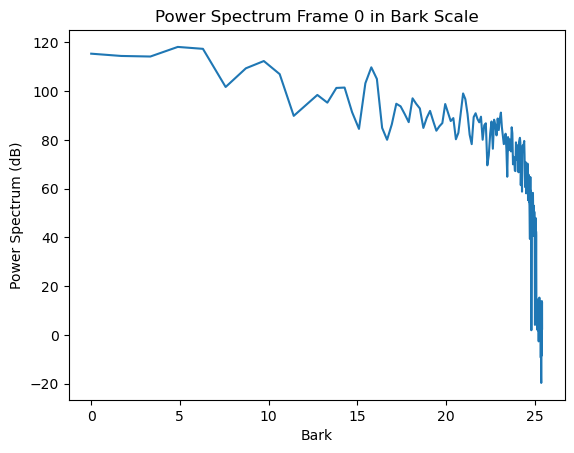

In [93]:
spectrum = np.zeros((1417, 256))
for k in range (1417):
    spectrum[k] = calculate_spectrum(windowed_frames.T[k])
    
N = 256
frame_to_plot = spectrum[100]
freq_bins = np.arange(len(frame_to_plot)) * (sr / N)
bark_scale = bark(freq_bins)
plt.plot(bark_scale, frame_to_plot)

plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('Power Spectrum Frame 0 in Bark Scale')
plt.show()


In [94]:
def ST(power_spectrum):
    ST = np.zeros(len(power_spectrum))
    for k in range(2, 249):    
        if 2 <= k < 63:
            if power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1] and power_spectrum[k] > power_spectrum[k + 2] + 7 and power_spectrum[k] > power_spectrum[k - 2] + 7:
                ST[k] = True
            
        if 63 <= k < 127: 
            if power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1] and power_spectrum[k] > power_spectrum[k + 2] + 7 and power_spectrum[k] > power_spectrum[k - 2] + 7 and power_spectrum[k] > power_spectrum[k + 3] + 7 and power_spectrum[k] > power_spectrum[k - 3] + 7:
                ST[k] = True
        
        if 127 <= k < 250: 
            if power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1] and power_spectrum[k] > power_spectrum[k + 2] + 7 and power_spectrum[k] > power_spectrum[k - 2] + 7 and power_spectrum[k] > power_spectrum[k + 3] + 7 and power_spectrum[k] > power_spectrum[k - 3] + 7 and power_spectrum[k] > power_spectrum[k + 4] + 7 and power_spectrum[k] > power_spectrum[k - 4] + 7 and power_spectrum[k] > power_spectrum[k + 5] + 7 and power_spectrum[k] > power_spectrum[k - 5] + 7 and power_spectrum[k] > power_spectrum[k + 6] + 7 and power_spectrum[k] > power_spectrum[k - 6] + 7:
                ST[k] = True
    return ST


In [95]:
def PTM(power_spectrum, mask):
    ptm = np.zeros(len(power_spectrum))
    for k in range(0, len(power_spectrum)):
        if mask[k]:
            ptm[k] = (10 * np.log10(10**(0.1 * (power_spectrum[k - 1])) + 10**(0.1 * (power_spectrum[k])) + 10**(0.1 * (power_spectrum[k + 1]))))

    return ptm

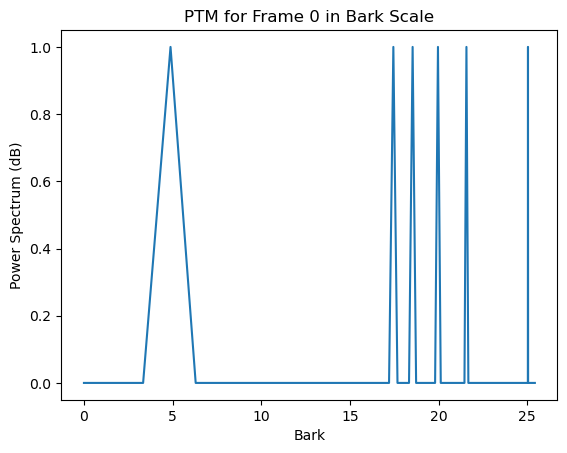

In [96]:
st = np.zeros((1417, 256))
ptm = np.zeros((1417, 256))
for k in range (1417):
    st[k] = ST(spectrum[k])
    ptm[k] = PTM(spectrum[k], st[k])
    
frame_to_plot = st[0]
freq_bins = np.arange(len(frame_to_plot)) * (sr / N)
bark_scale = bark(freq_bins)

plt.plot(bark_scale, frame_to_plot)
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PTM for Frame 0 in Bark Scale')
plt.show()


In [97]:
PNM = np.load('P_NM-24.npy')
PNMc = np.load('P_NMc-24.npy')
PTMc = np.load('P_TMc-24.npy')


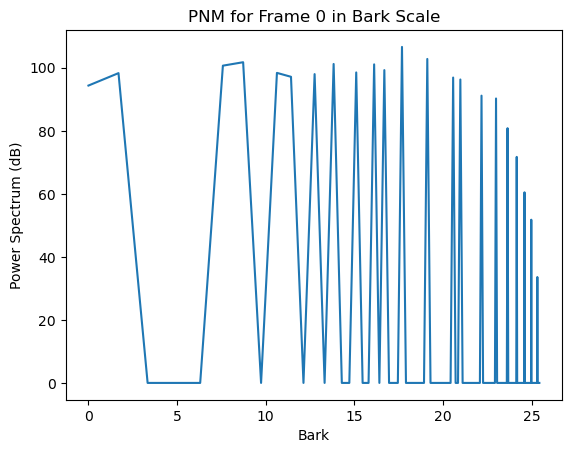

In [98]:
frame_to_plot = PNM.T[0]
freq_bins = np.arange(len(frame_to_plot)) * (sr / N)
bark_scale = bark(freq_bins)

plt.plot(bark_scale, frame_to_plot)
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PNM for Frame 0 in Bark Scale')
plt.show()

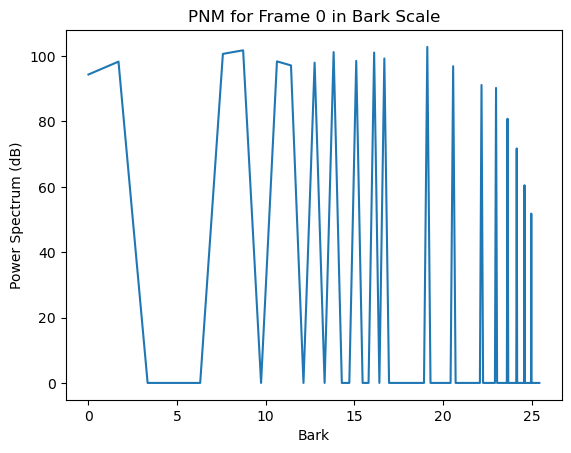

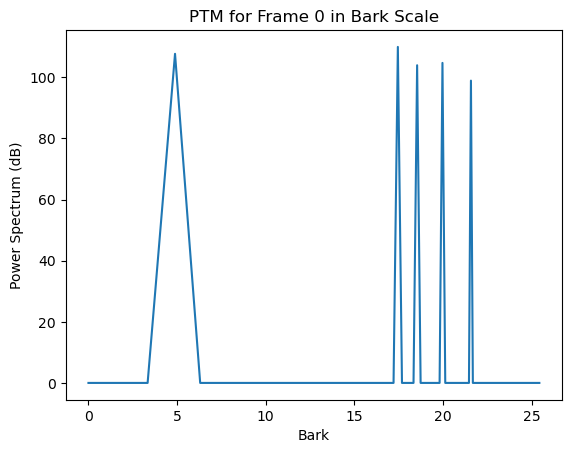

In [99]:
frame_to_plot1 = PNMc.T[0]
freq_bins1 = np.arange(len(frame_to_plot1)) * (sr / N)
bark_scale1 = bark(freq_bins1)

plt.plot(bark_scale1, frame_to_plot1)
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PNM for Frame 0 in Bark Scale')
plt.show()

frame_to_plot2 = PTMc.T[0]
freq_bins2 = np.arange(len(frame_to_plot2)) * (sr / N)
bark_scale = bark(freq_bins2)

plt.plot(bark_scale, frame_to_plot2)
plt.xlabel('Bark')
plt.ylabel('Power Spectrum (dB)')
plt.title('PTM for Frame 0 in Bark Scale')
plt.show()

In [100]:
def Tq():
    tq = np.zeros(256)
    tq[0] = float('inf')
    for f in range(1, 256): 
        tq[f] = 3.64 * (f / 1000) ** -0.8 - 6.5 * np.exp(-0.6 * ((f / 1000) - 3.3) ** 2) + (10 ** -3 )* (f / 1000) ** 4
        
    return tq

In [101]:
def sf(pm):
    sf = np.zeros((256, 256))
    for b in range(256):
        if pm[b] > 0:
            for a in range (0, 250):
                diff = bark(a) - bark(b)
                if -3 <= diff < -1:
                    sf[a][b] = 17*diff - 0.4*pm[b] + 11
                if -1 <= diff < 0:
                    sf[a][b] = (0.4*pm[b] + 6)*diff
                if 0 <= diff < 1:
                    sf[a][b] = -17*diff
                if 1 <= diff < 8:
                    sf[a][b] = (0.15*pm[b] - 17)*diff -0.15*pm[b]
    return sf

In [102]:
def ttm(sf, ptm):
    ttm = np.zeros((len(ptm), len(ptm)))
    
    for b in range(0, len(ptm)):
        for a in range (0, len(ptm)):
            ttm[a][b] = ptm[b] - 0.275*bark(b) + sf[a][b] - 6.025
    
    return ttm

In [103]:
def tnm(sf, pnm):
    tnm = np.zeros((len(pnm), len(pnm)))
    for b in range(0, len(pnm)):
        for a in range (0, len(pnm)):
            tnm[a][b] = pnm[b] - 0.175*bark(b) + sf[a][b] - 2.025
    
    return tnm

In [104]:
def Tg(Tq, TTM, TNM):
    tg = np.zeros(len(Tq))
    for i in range (len(Tq)):
        tg[i] = 10 * np.log10(10**(0.1 * Tq[i]) + np.sum(10**(0.1 * TTM[i])) + np.sum(10**(0.1 * TNM[i])))
    return tg

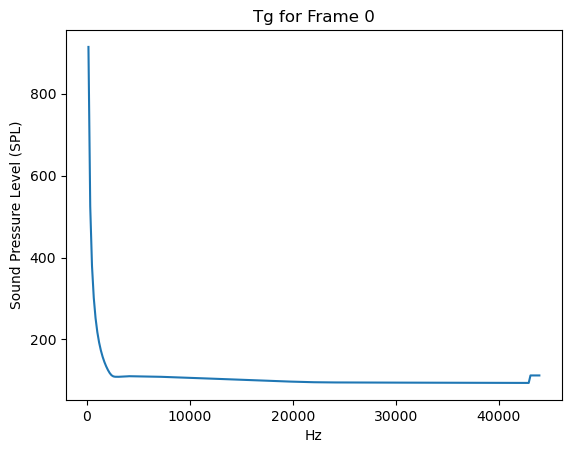

In [175]:
frame1 = PNMc.T[0]
frame2 = PTMc.T[0]
frame3 = windowed_frames.T[0]
a = ttm(sf(frame1), frame1)
b = tnm(sf(frame2), frame2)
c = Tq()
d = Tg (c, a, b)

frame_to_plot = d
freq_bins = np.arange(len(frame_to_plot)) * (sr / N)
bark_scale = bark(freq_bins)

plt.plot(freq_bins, frame_to_plot)
plt.xlabel('Hz')
plt.ylabel('Sound Pressure Level (SPL)')
plt.title('Tg for Frame 0')
plt.show()

# ΜΕΡΟΣ 2

In [117]:
def hk(M):
    L = 2 * M
    hk_array = np.zeros((M, L))
    for k in range(M):
        for n in range(L):
            hk_array[k, n] = np.sin(((n + 0.5) * np.pi / (2 * M))) * np.sqrt(2 / M) * np.cos(((2 * n + M + 1) * (2 * k + 1) * np.pi) / (4 * M))

    return hk_array

In [118]:
def gk(hk, M):
    L = 2 * M
    gk_array = np.zeros((M, L))
    for k in range(M):
        for n in range(L):
            gk_array[k, n] = hk[k, 2 * M - 1 - n]

    return gk_array

In [165]:
def bk(Tg):
    #a = int(k * 44100 / 32)
    #b = int((k+1) * 44100 / 32)
    #freq_bins = np.arange(len(Tg)) * (sr / N)
    #for i in range(len(Tg)):
        #if not(a <= freq_bins[i] <= b):
            #Tg[i] = 500000000000
    Bk = int(np.log2((2**16) / np.min(Tg)) - 1)
    #Bk = max(0, Bk)
    
    return Bk

In [164]:
def find_nearest(x, y): #used in quantization
    smallest = abs(x-y[0])
    idx = 0
    for i, k in enumerate(y):
        if (abs(x-k) < smallest):
            smallest = abs(x-y[i])
            idx = i
    return y[idx]

def adaptive_quantizer(y, Tg, w):
    xmax = np.amax(w)
    xmin = np.amin(w)
    number_levels = 2**bk(Tg)
    delta = (xmax-xmin)/(number_levels-1) #denominator needs -1
    levels = np.empty(number_levels)
    for i in range(number_levels):
        levels[i] = xmin + i*delta
    new_y = np.zeros(len(y))
    for i, k in enumerate(y): # αποθηκεύει δείκτη και τιμή του στοιχέιου
        new_y[i] = find_nearest(k, levels)
        
    return new_y 

def non_adaptive_quantizer(y):
    xmax = 1
    xmin = -1
    number_levels = 2**8
    delta = (xmax-xmin)/(number_levels-1) #denominator needs -1
    levels = np.empty(number_levels)
    for i in range(number_levels):
        levels[i] = xmin + i*delta
    new_y = np.zeros(len(y))
    for i, k in enumerate(y):
        new_y[i] = find_nearest(k, levels)
        
    return new_y

In [166]:
def interpolation(quantized_signal):
    w = np.zeros(len(quantized_signal) * 32)
    w[::32] = quantized_signal
    return w

In [168]:
h = hk(32)
g = gk(h, 32)

final_aq = np.zeros(1417 * 639)
final_naq = np.zeros(1417 * 639)
bits_final_for_aq = 0
c = Tq()

for k in range (1417):
    a = ttm(sf(PNMc.T[k]), PNMc.T[k])
    b = tnm(sf(PTMc.T[k]), PTMc.T[k])
    d = Tg (c, a, b)
    bits_final_for_aq += bk(d)
    final1 = np.zeros(639)
    final2 = np.zeros(639)
    helping_bits = 0
    for i in range (32):
        v = np.convolve(h[i], windowed_frames.T[k])
        v = v[::32]
        aq = adaptive_quantizer(v, d, windowed_frames.T[k])
        naq = non_adaptive_quantizer(v)
        final1 =np.add(final1, np.convolve(interpolation(aq), g[i]))
        final2 = np.add(final2, np.convolve(interpolation(naq), g[i]))
    final_aq[k * 512 : (k + 1) * 512 + 127] += final1
    final_naq[k * 512 : (k + 1) * 512 + 127] += final2


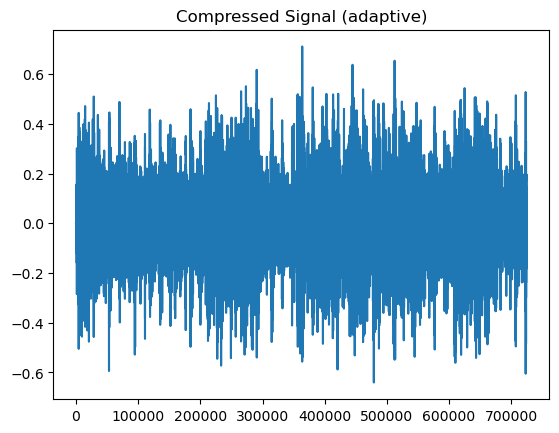

In [169]:
import sounddevice as sd
from scipy.io import wavfile

final_aq.resize(725210)
sd.play(final_aq, 44100)
plt.plot(final_aq)
plt.title("Compressed Signal (adaptive)")
normalized = np.int16((final_aq / final_aq.max()) * 32767)
wavfile.write('adaptive_quantizer.wav', 44100, normalized)

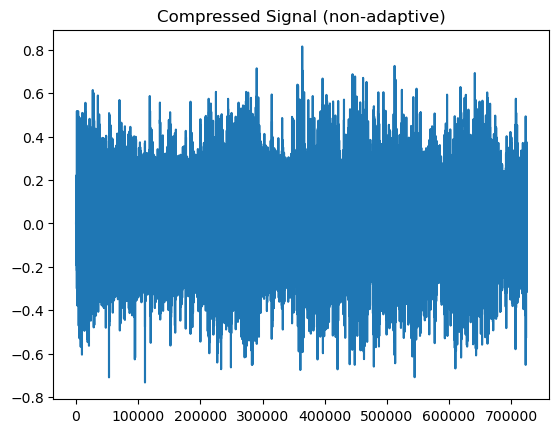

In [170]:
import sounddevice as sd
from scipy.io import wavfile

final_naq.resize(725210)
sd.play(final_naq, 44100)
plt.plot(final_naq)
plt.title("Compressed Signal (non-adaptive)")
normalized2 = np.int16((final_naq / final_naq.max()) * 32767)
wavfile.write('non_adaptive_quantizer.wav', 44100, normalized2)

Mean Square Error - Adaptive: 0.08830773824028763


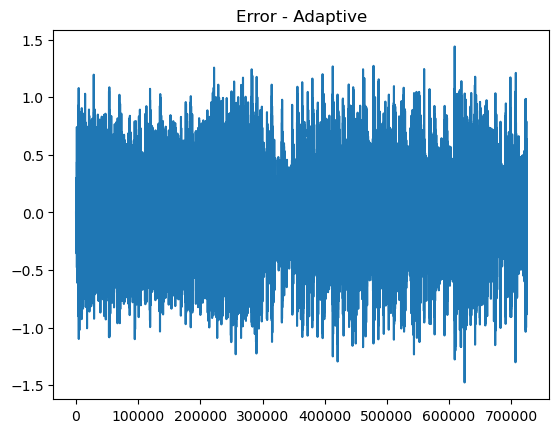

In [171]:
error_adapt = audio_data[0:725210]-final_aq
plt.plot(error_adapt)
plt.title("Error - Adaptive")
print("Mean Square Error - Adaptive:", np.mean(np.square(error_adapt)))

Mean Square Error - Non - Adaptive: 0.0879698088233448


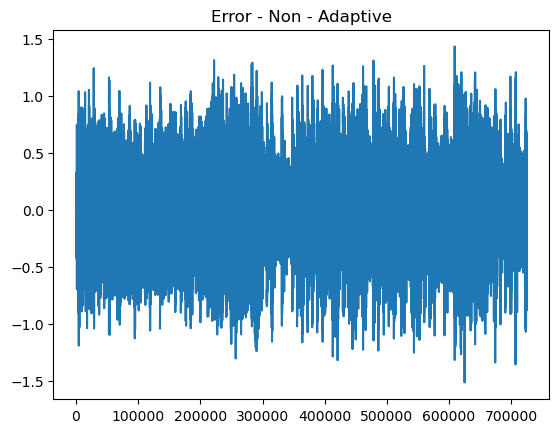

In [172]:
error_adapt = audio_data[0:725210]-final_naq
plt.plot(error_adapt)
plt.title("Error - Non - Adaptive")
print("Mean Square Error - Non - Adaptive:", np.mean(np.square(error_adapt)))

In [173]:
def rate_of_compression(bits):
    return 1 - (bits / (16*512*1417))

In [174]:
print(rate_of_compression(bits_final_for_aq))
print(rate_of_compression(8*512*1417))

0.9990234375
0.5


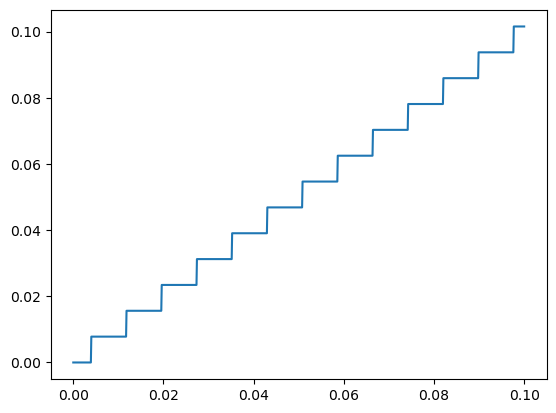

In [282]:
#For plotting the non_adaptive_quantizer
q = 2**(-7)
x = np.linspace(0, 0.1, 1000)
y = q * np.round(x/q)
plt.plot(x,y)